Submitted by Shandro Chakraborty, ID: 200419464, email: scp931@uregina.ca 

**Choosing the Dataset**

For this Python notebook, the dataset on video game sales data has been chosen. This dataset was obtained from Kaggle.com. The video game dataset contains infromation of of sales data 16718 games from 1985 to December 2016. Video game is quickly becoming giant as an industry in North America and all over the world specially Japan. The goal of choosing this dataset is to explore the global sales number of a video game based on the different attributes of the dataset and after exploring the dataset build a prediction model for the global sales number. This particular dataset provides all the necesary  information on all the attributes required to perform in depth analysis and  build the prediction model. To complete the analysis and the  prediciton model the dataset needs to be cleaned and properly formatted to perform various operations on the data.   

Source of the dataset : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

**Obtaining Data**

As the dataset comes in a .csv format and downloaded to the local drive as a zipped file. For uploading the dataset to this notebook the following libraries had be imported. Along with importing the dataset, these libraries such as pandas, numpy, matplotlib, seaborn also helps with properly formating the dataset and perform visualization of the dataset.


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from  matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

In [ ]:
!pip install brewer2mpl

In [ ]:
from brewer2mpl import qualitative


In [ ]:
from google.colab import files # for importing dataset form local drive to this notebook
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [ ]:
import io

**Formatting the Data** 

Now that the dataset has been uploaded to the notebook,  let's assign the dataset to a dataframe. This operation is done using the Pandas library which makes it easier to perform actions on dataset.  

After formatting the dataset into dataframe format,we can see that there are 16718 rows and 16 columns. 

In [ ]:
data_game = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales_as_at_22_Dec_2016.csv'])) 
data_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


To avoid any error, it is a better practice to make sure that the dataset does not contain any null values. Therefore, all the rows that contains any null values are dropped.

In [ ]:
data_game.dropna()
pd.isnull(data_game).sum() > 0

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [ ]:
data_game = data_game[data_game["Critic_Score"].notnull()]
data_game = data_game[data_game["User_Score"].notnull()]
data_game = data_game[data_game["Genre"].notnull()]
data_game = data_game[data_game["NA_Sales"].notnull()]
data_game = data_game[data_game["EU_Sales"].notnull()]
data_game = data_game[data_game["JP_Sales"].notnull()]
data_game = data_game[data_game["Other_Sales"].notnull()]
data_game = data_game[data_game["Global_Sales"].notnull()]
data_game = data_game[data_game["Developer"].notnull()]
data_game = data_game[data_game["Rating"].notnull()]
data_game = data_game[data_game["Publisher"].notnull()]
data_game = data_game[data_game["Genre"].notnull()]
data_game = data_game[data_game["Year_of_Release"].notnull()]
data_game = data_game[data_game["Platform"].notnull()]
data_game = data_game[data_game["Name"].notnull()]

**Exploratory Data Analysis**

As mentioned earlier, the goal is to predict the global sales number, therefore, we do not need most of the columns in the dataset. But before removing them I'd like to find out the global sales number based on the some of the attributes. 

Now, let's check the type of data that are being represented in each attributes. So that if needed we can change data type to our preference. 

In [ ]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 16706
Data columns (total 16 columns):
Name               7877 non-null object
Platform           7877 non-null object
Year_of_Release    7877 non-null float64
Genre              7877 non-null object
Publisher          7877 non-null object
NA_Sales           7877 non-null float64
EU_Sales           7877 non-null float64
JP_Sales           7877 non-null float64
Other_Sales        7877 non-null float64
Global_Sales       7877 non-null float64
Critic_Score       7877 non-null float64
Critic_Count       7877 non-null float64
User_Score         7877 non-null object
User_Count         6825 non-null float64
Developer          7877 non-null object
Rating             7877 non-null object
dtypes: float64(9), object(7)
memory usage: 1.0+ MB


Now, see what is the dimension of the dataset after the initial cleaning. The dimension is 7877, 16 meaning there are 7877 rows and 16 columns in the dataset.

In [ ]:
#dimension of the dataset
data_game.shape

(7877, 16)

To find out if there are any anomalies in the dataset even after cleaning lets take a look the first 10 rows and last 10 rows of the dataset. Which shows that there are no anomalies or any odd points in the dataset.

In [ ]:
data_game.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [ ]:
data_game.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.0,0.0,0.01,81.0,46.0,8.5,151.0,Shin'en,E
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16673,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,Banpresto,0.01,0.00,0.0,0.0,0.01,72.0,13.0,tbd,NaN,Banpresto,T
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.0,0.0,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.0,0.0,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.0,0.0,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


As the dataset contains a number of numeric data, lets take a look at the overview of the numeric attributes using the describe() function. The describe() function gives a statistical overview the numerical attributes. It includes the total count, maximum and minimum values and the average value of each numerical attributes.

In [ ]:
data_game.describe(include = "all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,7877,7877,7877.000000,7877,7877,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877,6825.000000,7877,7877
unique,4959,17,NaN,12,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,1435,7
top,Madden NFL 07,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,EA Canada,E
freq,8,1275,NaN,1832,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052,NaN,155,2738
mean,NaN,NaN,2007.158817,NaN,NaN,0.357915,0.211217,0.056213,0.073688,0.699313,69.001396,26.562778,NaN,174.722344,NaN,NaN
std,NaN,NaN,4.157335,NaN,NaN,0.907291,0.644077,0.268787,0.252821,1.841246,13.922147,19.053999,NaN,587.428538,NaN,NaN
min,NaN,NaN,1985.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2004.000000,NaN,NaN,0.050000,0.010000,0.000000,0.010000,0.100000,60.000000,12.000000,NaN,11.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.130000,0.050000,0.000000,0.020000,0.250000,71.000000,22.000000,NaN,27.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.350000,0.180000,0.010000,0.060000,0.660000,79.000000,37.000000,NaN,89.000000,NaN,NaN


**Visual Representation and Initial Findings**

For representing sales number in a concise manner, we should represent the data form the in various visual format. We are going to take a look at the global sales number of games based on various features from the dataset. Let's start with global sales number of games for each game consoles in every year from 1985 to 2016. 

From the plot, we see that in general, games released on PS2, WII and XBOX 360 have sold the most number of games throughout the years and 2008 in particular saw the most number of sales.
  

Text(0, 0.5, 'Global Sales')

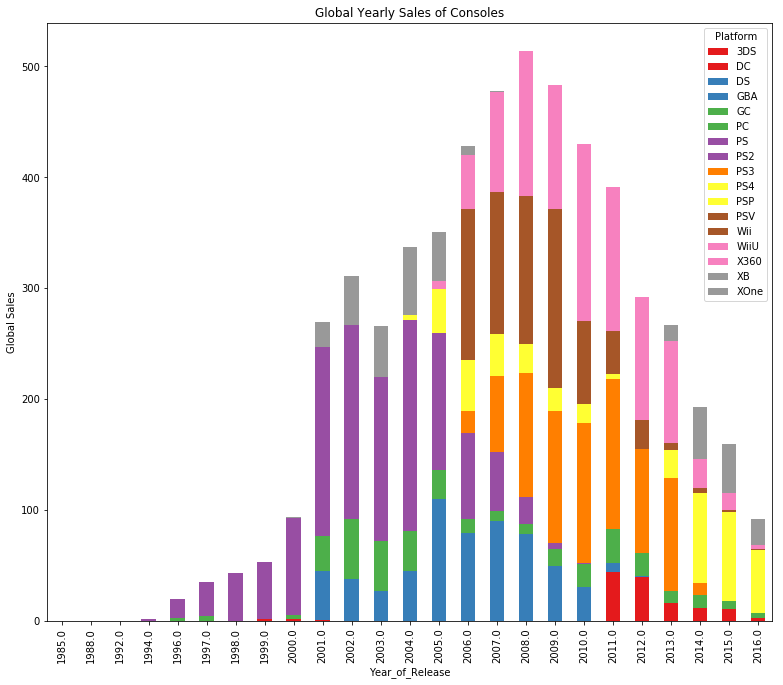

In [ ]:
yearlySales = data_game.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Set1',  
                           grid=False,  figsize=(13,11))
plt.title('Global Yearly Sales of Consoles')
plt.ylabel('Global Sales')

From this plot we can that the games with critics rating between 76 and 83 saw the best number of sales and a large number of these games were released on the Nintendo WII console. 

Text(0, 0.5, 'Global Sales')

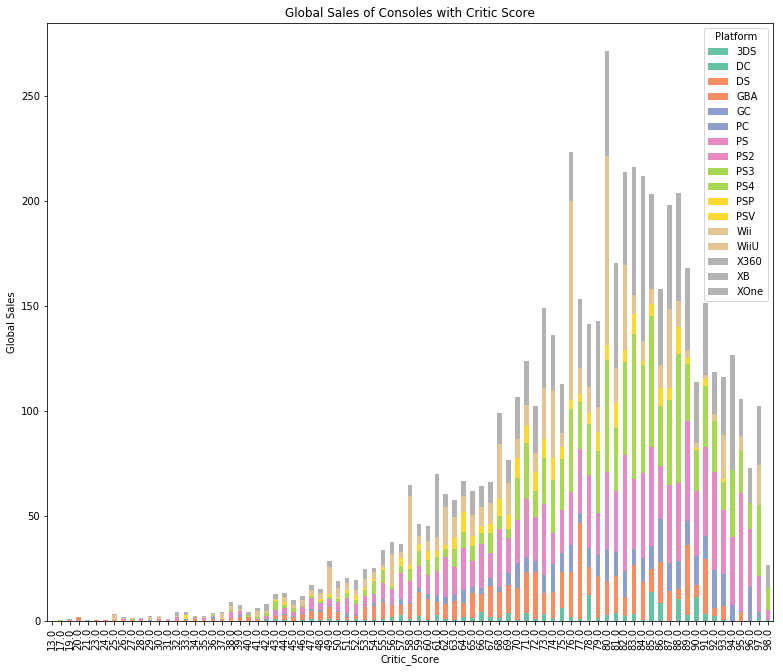

In [ ]:
yearlySales = data_game.groupby(['Critic_Score','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  
                           grid=False,  figsize=(13,11))
plt.title('Global Sales of Consoles with Critic Score')
plt.ylabel('Global Sales')

Genre of a game plays a major role in the sales number.  From the plot we see that Action, Sport and Shooter genre saw the most number of sales both in every year and combined. 

Text(0, 0.5, 'Global Sales')

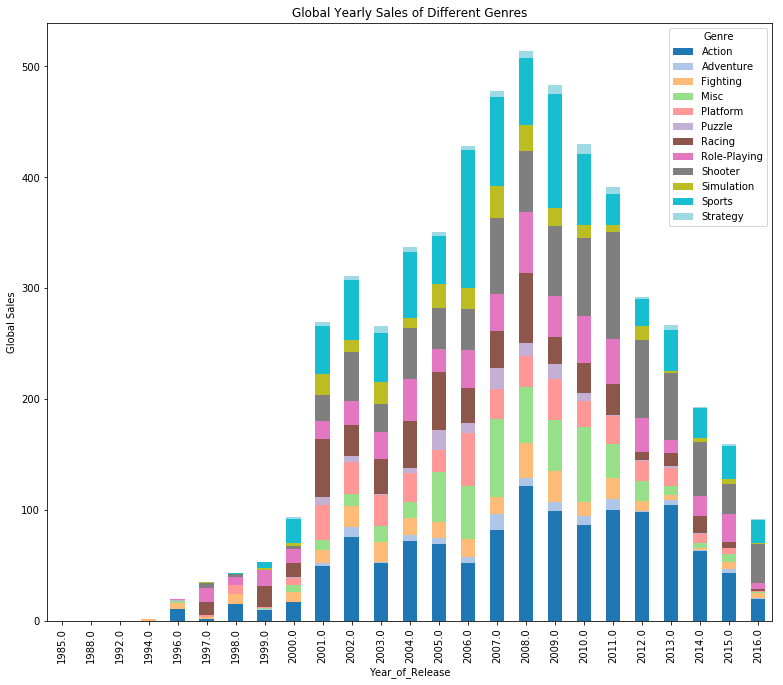

In [ ]:
yearlySales = data_game.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'tab20',  
                           grid=False,  figsize=(13,11))
plt.title('Global Yearly Sales of Different Genres')
plt.ylabel('Global Sales')

To support the findings form the previous plot, here sales numbers from each genre has been combined. The result shows that Action, Sport and Shooter genre has been the best selling genres in games. Among the game consoles, PS2, PS3, Xbox 360 and Wii have seen the most number of sales in these genres.

Text(0, 0.5, 'Global Sales')

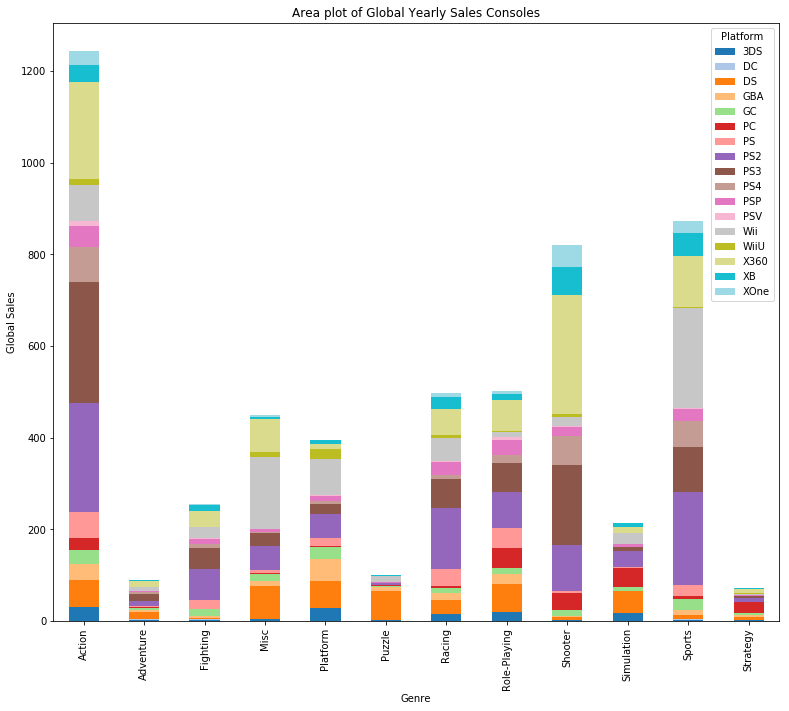

In [ ]:
yearlySales = data_game.groupby(['Genre','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'tab20',  
                           grid=False,  figsize=(13,11))
plt.title('Area plot of Global Yearly Sales Consoles')
plt.ylabel('Global Sales')

Video game rating provides a restrictions on which age group can play cenrtain types of games. Therefore, theoritically games that are rated for everyone should have better sales than games rated for mature audience. Form the plot, we see that "E"(everyone) rated games are the most sold games and sports genre has the most number of games in this category.  

Text(0, 0.5, 'Global Sales')

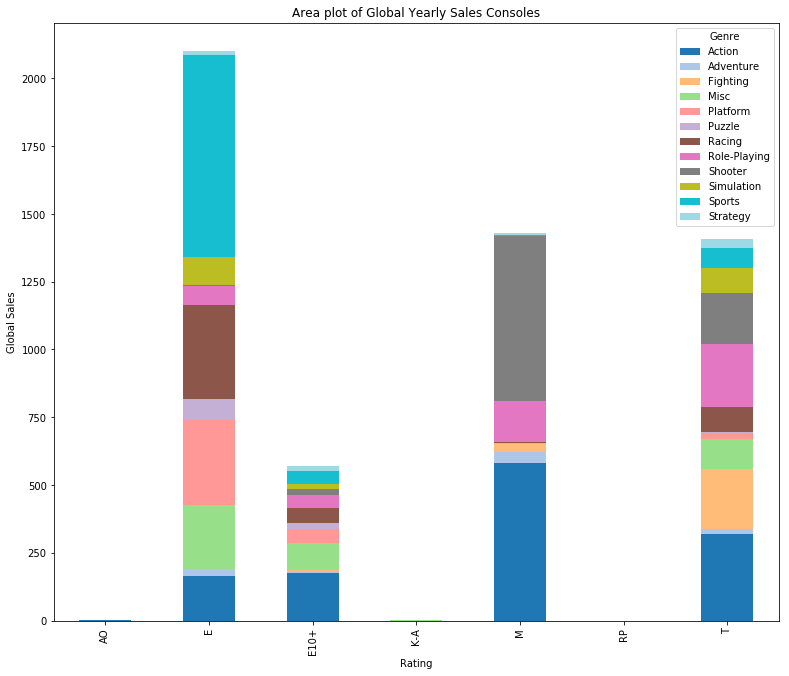

In [ ]:
yearlySales = data_game.groupby(['Rating','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'tab20',  
                           grid=False,  figsize=(13,11))
plt.title('Area plot of Global Yearly Sales Consoles')
plt.ylabel('Global Sales')

Now that we have explored the sales number based on diffeterent features of the dataset, lets focus on looking at the North American sales number and Japanese Sales number compared to overall global sales number in two different types of plotting format.  

Now, as form the graphs below, it is clear that majority of the sales are coming from North american region and Europian region compared to other regions. Also, between the different plot type, the second plot with frequency represents the overall comparision better than scatter plot. 

From the plots, we see that Japanes sales number reached above 6 million at best where in North America the number reached more than 40 million and in Europian region it reached just below 30 million in sales number. The plot with frequency format (2nd plot) shows the representation clearly.

False


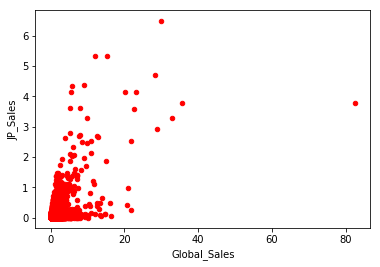

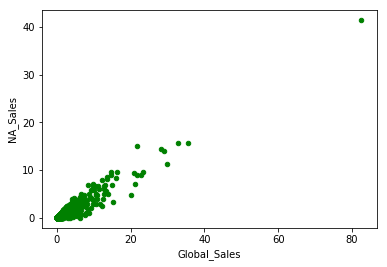

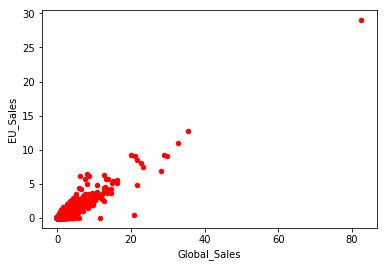

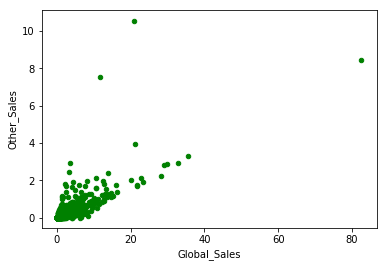

In [ ]:
scatter_plot1 = data_game.plot.scatter (x = 'Global_Sales',
                                      y = 'JP_Sales', color = 'r')

scatter_plot2= data_game.plot.scatter (x = 'Global_Sales',
                                      y = 'NA_Sales', color = 'g')

scatter_plot3 = data_game.plot.scatter (x = 'Global_Sales',
                                      y = 'EU_Sales', color = 'r')

scatter_plot4= data_game.plot.scatter (x = 'Global_Sales',
                                      y = 'Other_Sales', color = 'g')

print (scatter_plot1 == scatter_plot2 == scatter_plot3 == scatter_plot4)

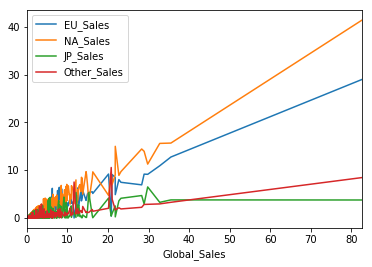

In [ ]:
data_game.plot(x = 'Global_Sales', y = ['EU_Sales','NA_Sales','JP_Sales','Other_Sales'])

From the plots we can see a pattern that shows that the number of games sold in North America and Europe has a large affect on global sales number. With the increase of the sales number in these two region we see the increase of global sales number too. Therefore, there might be a direct correlation between the global sales number of games with NA and EU sales number. For building a global sales number prediction model, the dataset can be splitted into training and test set and one or more regression algorthims can be used to build the prediction model. Finally, the prediction model can be applied on the fictional dataset to validate the prediction model. 

**The Prediction Model**

Now, the focus of this notebook will shift towards creating a prediction model. There are a number of cruicial steps that are necessary to make sure that the model we are trying to build is as accurate as possible. The first step is selecting algorithms. Since, the goal is to predict the global sales, meaning the data we are interested are continuous. Which leads us to look for suitable regression algorithms rather than classification algorithms as the we are not prediciting any classification. 

For this prediciton model, initially Linear Regression, Logistic Regression, Support Vector Regression and Stochastic gradient descent have been selected. The aim is to train the algorithms on the same dataset to determine which algorithm is a better fit for the proposed model. 


Let's start with importing the classifiers using the Scikit-learn library.

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from  matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import LinearSVC
from brewer2mpl import qualitative

In [ ]:
!pip install  scikit-plot

In [ ]:
import scikitplot as skplt

We mentioned in our analysis part that we are going to look for the data type in the dataset. Turns out the sales number were float value. To overcome any kind of error, the type of data is changed to integer. Also, the numbers in the sales columns are in million, therefore before converting the datatype we are multiplying the float values with 1000000 so that we dont train the classifiers on wrong data.   

In [ ]:
data_game['NA_Sales'] = data_game['NA_Sales'].astype(int)
data_game['EU_Sales'] = data_game['EU_Sales'].astype(int)
data_game['JP_Sales'] = data_game['JP_Sales'].astype(int)
data_game['Other_Sales'] = data_game['Other_Sales'].astype(int)
data_game['Global_Sales'] = data_game['Global_Sales'].astype(int)

In our analysis part we saw that a majority of the game sales number are coming from NA and EU region, therefore the initail aim is to predict gloabl sales number of video game based on EU and NA region. 
Along with that, the dataset is also being split into two parts, one for training the classifiers and one part is for testing the accuracy of the classifiers.

In [ ]:
A = data_game.loc[:,['NA_Sales', 'EU_Sales']]
B = data_game['Global_Sales']

x_train,x_test,y_train,y_test = train_test_split(A,B)


In [ ]:
x_train.shape

(5907, 2)

In [ ]:
x_test.shape

(1970, 2)

At first, we are starting with Linear Regression classifier. Linear regression algorithm is best used in a regression problem therefore this classifier is a suitable candidate for this mdoel. 

In the graphical plot, the x axis represents the number of training data and the y axis represents the accuracy score based on the training data. From the test we see that with the increase of training data particularly after 1500 training data, this classifier achieves an accuracy 85.3% and from the plot we see that the cross validation score is very strong. That indicates that the linear regression based prediction model will also perform well in any independent dataset.   

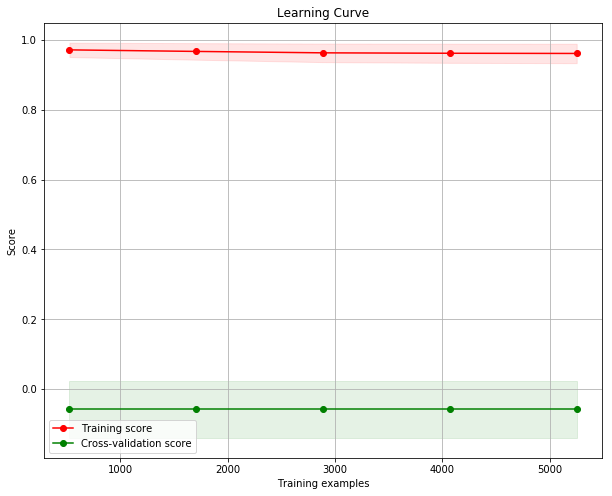

In [ ]:
global_Lin = LinearRegression()
global_Lin.fit(x_train,y_train)
global_predict_LR= global_Lin.predict(x_test)
global_Lin.score(x_test,y_test)

skplt.estimators.plot_learning_curve(global_Lin, A,B,figsize=(10,8))
plt.show()

In [ ]:
global_Lin.score(x_test,y_test)

0.9391105027607958

Logistic regression is another classifier that canbe used in both regression and classification problem. This particualr classifier is built upon linear regression that is why the classifier performs well on both type of prediction analysis. Here, we see that the accuracy of logisitc regression in this dataset is 84.4% and similar to linear regression the cross validation score is also strong.

In [ ]:
global_LR = LogisticRegression()
global_LR.fit(x_train,y_train)
global_predict_LR= global_LR.predict(x_test)
global_LR.score(x_test,y_test)

0.8456852791878172

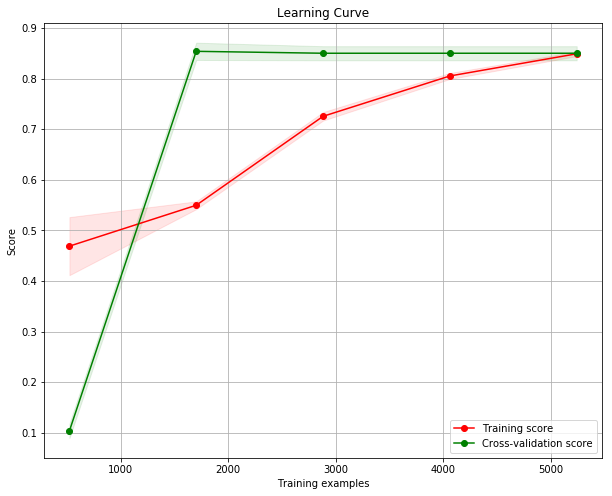

In [ ]:
skplt.estimators.plot_learning_curve(global_LR, A,B,figsize=(10,8))
plt.show()

In [ ]:
print(classification_report(global_LR,y_test))

TypeError: ignored

Here, we see that support vector regression classifier performed strongly in the dataset with  90.3% accuracy. From the plot, it clearly shows that the cross validation performance is very low. Even when the training sample is increasing the cross validation score is staying poor, which indicates that even though this classifier will perform very well on this particular dataset but if we try to use this precidtion model using SVR on any other independent dataset it will perform poorly.     

In [ ]:
global_SVR = SVR(gamma='scale', kernel = 'linear',  C=1.0, epsilon=0.1)
global_SVR.fit(x_train,y_train)
global_predict_SVR = global_SVR.predict(x_test)
global_SVR.score(x_test,y_test)

0.9395818661045248

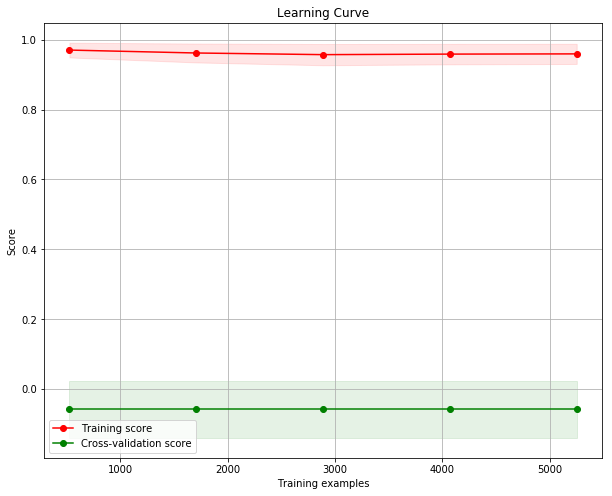

In [ ]:
skplt.estimators.plot_learning_curve(global_SVR, A,B,figsize=(10,8))
plt.show()

Similar to SVR, Stochastic gradient descent(SGD)  classifier also perform well with accuracy of 90.35% but with very poor cross validation score even with increaing number of training data. Therefore, this too is not an ideal classifier to use for prediction in any other independent database.   

In [ ]:
global_SGD = linear_model.SGDRegressor(max_iter=100000, tol=1e-3)
global_SGD.fit(x_train,y_train)
global_predict_SGD = global_SGD.predict(x_test)
global_SGD.score(x_test,y_test)

0.929980316950487

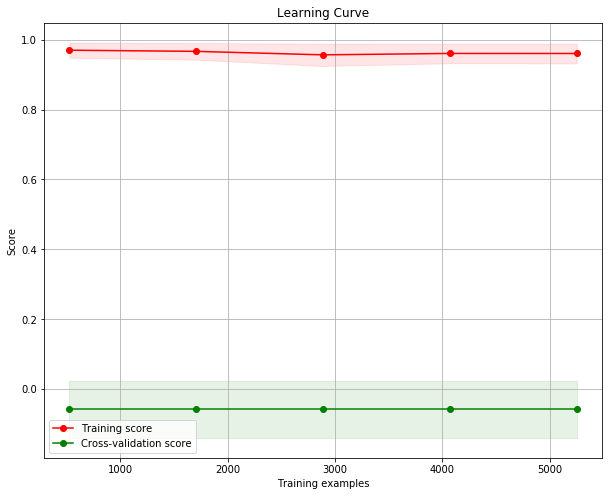

In [ ]:
skplt.estimators.plot_learning_curve(global_SGD, A,B,figsize=(10,8))
plt.show()

Both SVR and SGD demonstrate a major problem in machine learning, which is called overfitting. Overfitting in machine learning field means that the algorithms or classifiers being used to train on the data only works best on that particular data. That means if the dataset is changed the claassifiers will perform poorly. 

Now that we have identified the problem with SVR and SGD classifiers, from now on, the prediction model will be built around linear regression and logistic regression. Even though these two regression model had lower accuracy score than SVR and SGD the fact that these two classifiers can also perform relatively well on other dataset should be major advantage over the SGD and SVR classifiers. 

Before moving forward, the regression classifiers should be validated using well known regression validation technique which is comparing r-squared value of the classifier with mean sqaured error value. 

From the score we see that for both of the classifiers, the values of r-square and mean squared error are matched therefore the calssifiers should be considered validated. With that we can go forward with the model.  

In [ ]:
#mean squared error value of linear regression
mean_squared_error(y_test, global_predict_Lin) 


NameError: ignored

In [ ]:
# r squared value of linear regression
np.mean((y_test-global_predict_Lin)**2)

In [ ]:
#mean squared error value of logistic regression
mean_squared_error(y_test, global_predict_LR) 


In [ ]:
# r squared value of logistic regression
np.mean((y_test-global_predict_LR)**2)

Initially we tried to predict the gloabl sales based on the sales value of NA and EU region. Now, to further analyze whether we can make a better prediction model, the global sales number is being predicted based on JP and EU sales number. The accuracy of this prediction increased with increasing number trainning examples so is the cross validation score. The accuracy score based on JP and EU region sales number is 84.41% and for this prediciton logistic regression has been used. Another prediction has been made based on JP and NA region with accuracy of 84.36%. 

In [ ]:
# prediction based on JP, EU sales using logistic regression
x = data_game.loc[:,['JP_Sales', 'EU_Sales']]
y = data_game['Global_Sales']

x_train,x_test,y_train,y_test = train_test_split(A,B)

global_LR_1 = LogisticRegression()
global_LR_1.fit(x_train,y_train)
global_predict_LR= global_LR_1.predict(x_test)
global_LR_1.score(x_test,y_test)

skplt.estimators.plot_learning_curve(global_LR_1, x,y,figsize=(10,8))
plt.show()

In [ ]:
#logisitc regression accuracy
global_LR_1.score(x_test,y_test)

In [ ]:
# prediction based on JP, NA sales using logistic regression
x = data_game.loc[:,['NA_Sales', 'JP_Sales']]
y = data_game['Global_Sales']

x_train,x_test,y_train,y_test = train_test_split(A,B)

global_LR_2 = LogisticRegression()
global_LR_2.fit(x_train,y_train)
global_predict_LR= global_LR_2.predict(x_test)
global_LR_2.score(x_test,y_test)

skplt.estimators.plot_learning_curve(global_LR_2, x,y,figsize=(10,8))
plt.show()

In [ ]:
#logisitc regression accuracy
global_LR_2.score(x_test,y_test)

As we have used logisitc regression for predicting gloabl sales, now let's use linear regression for the same prediction using identical attributes. This way a direct comparision can be made between the two classifers.Now, from the graphics plots below we see that the accuracy score is 91.99% and 76.29% using linear regression. 

In [ ]:
# prediction based on JP, EU sales using linear regression
x = data_game.loc[:,['JP_Sales', 'EU_Sales']]
y = data_game['Global_Sales']

x_train,x_test,y_train,y_test = train_test_split(A,B)

global_Lin_1 = LinearRegression()
global_Lin_1.fit(x_train,y_train)
global_predict_Lin= global_Lin_1.predict(x_test)
global_Lin_1.score(x_test,y_test)

skplt.estimators.plot_learning_curve(global_Lin_1, x,y,figsize=(10,8))
plt.show()

In [ ]:
global_Lin_1.score(x_test,y_test)

In [ ]:
# prediction based on JP, NA sales using linear regression
x = data_game.loc[:,['NA_Sales', 'JP_Sales']]
y = data_game['Global_Sales']

x_train,x_test,y_train,y_test = train_test_split(A,B)

global_Lin_2 = LinearRegression()
global_Lin_2.fit(x_train,y_train)
global_predict_LR= global_Lin_2.predict(x_test)
global_Lin_2.score(x_test,y_test)

skplt.estimators.plot_learning_curve(global_Lin_2, x,y,figsize=(10,8))
plt.show()

In [ ]:
global_Lin_2.score(x_test,y_test)

With prediction made using both the linear regression and logistic regression model, comparing these two classifiers we see that for prediction based on NA and EU region logistic regression(LR) and linear regression(LIN_R)scores 84.41% and 85.39% respectively. Prediction based on NA and JP using LR and LIN_R is 84.36% and 76.29%. Finally with prediction based on JP and EU region using LR and LIN_R the accuracy socre is 84.41% and 91.99%. 

As we can see that linear regression achieved both the highest and the lowest accuracy score in different scenario whereas logistic regression had similar performance in terms of accuracy in all the scenarios. Based on this comparision, prediction with logistic regression proves to be more accurate and dependable. 

One major point to observe accross all the plots is that whenever JP sales data is used the cross validation score drops dramatically. Meaning if we are to use the prediction model trained on JP sales data on any other dataset we will get poor result. But prediction made from Eu and NA regions are perfomring very well. 

Therefore, the model created with Logistic Regression based on NA and EU sales number is the most consistent accross all over tests. And given that it shows strong cross validation score means that this model will perform as strong on other independent datasets too. 

**Summary**

The goal of this notebook was to explore the video game sales data and based on the findings create a model to predict global sales number. From the data exploration a pattern was found between global sales number and regional sales number. To create the prediction model initially four different algorithms were tested only to find out that out of them only two of the algorithms, logistic regression and linear regression are suitable for this model. Using these two algorithms, global sale number were predicted based on few different attributes like north american, european region and japanese sales number. From both of the classifiers accuracy percentage and cross validation score remarked. By comparing the two classifers it was found that logistice regression was teh better fit for the model with relatively high accuracy and better cross validation score accross all the tests.   

As for the further exploration and analyzation, this dataset also includes information on multiple gaming console, game genre, developer and critics score. Therefore, in the future there are scope to further analyze the dataset in terms predicting critical score based on developer, genre or console or combination of all of them. 

This notebook focused primarily on sales numbers form the dataset and after data exploration and creating prediction model, it successfully predicted global sales number of video games based on regional sales number. With this notebook a number of data analysis techniques have been learned along with that the preiction model provided excellent examples of which alogirhtms are better fitted for which sorts of data. Which is a knowledge that can have major advantages in the future for further exploration in data science and machine learning model creation.